## Plot Loss Function of a set of experiments

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
sns.set_context(font_scale=1.25)

# neuronas n

fpath = "../../../../../data/output/case_1/schwarzschild/"


df = pd.read_csv(fpath + "metrics/losses_test.csv")


df.loc[
    df['test_name'] == 'kan',
    'number_of_hidden_neurons'
] = 'kan'

df = df.melt(id_vars=['number_of_hidden_neurons', 'epochs'], value_vars=["test_metric", "train_metric"], var_name="dataset", value_name="loss")
df["dataset"] = df["dataset"].apply(lambda x: "train" if x == "train_metric" else "test")



In [7]:
df.number_of_hidden_neurons.unique()

array([32, 24, 16, 8, 2, 40, 48, 56, 64, 'kan'], dtype=object)

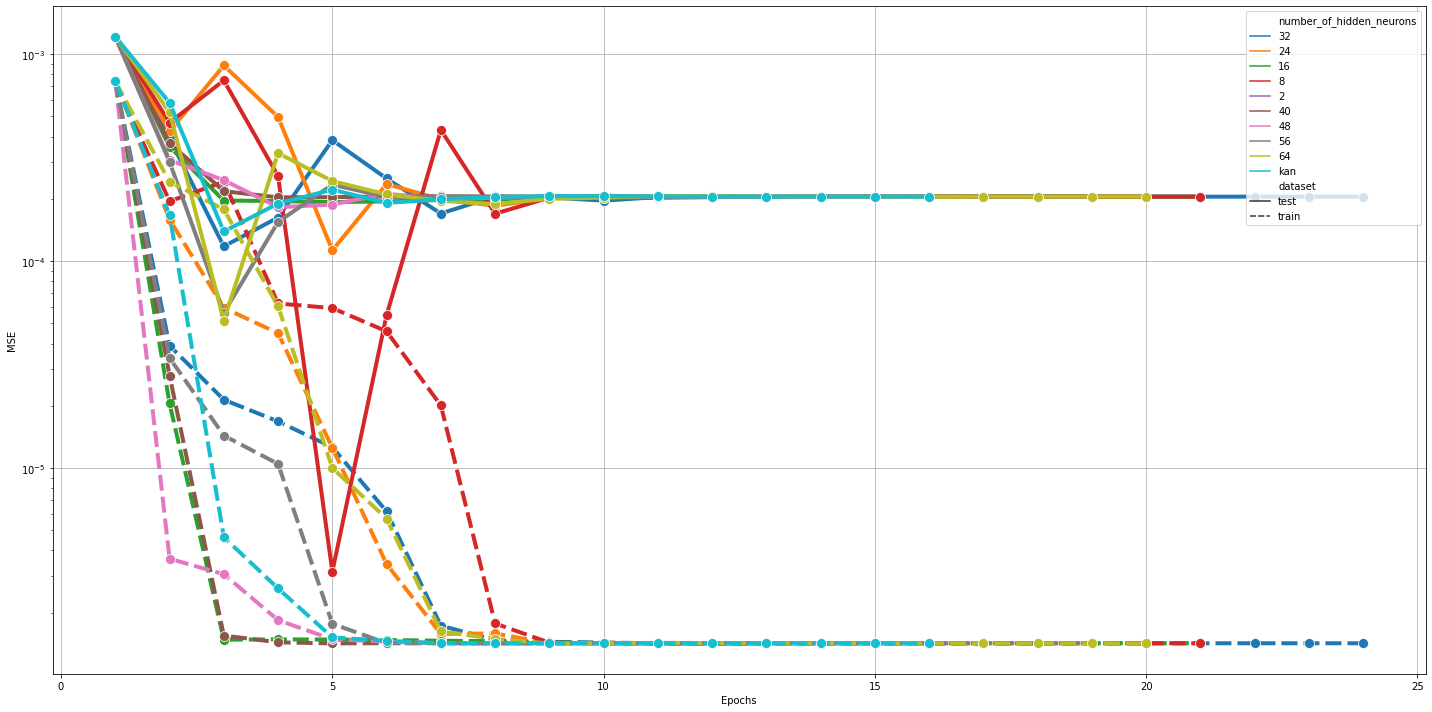

In [8]:

fig, ax1 = plt.subplots(nrows=1, figsize=(20,10))
ax1.set_xlabel("Epochs")
ax1.set_ylabel("MSE")
sns.lineplot(data=df, x="epochs", y="loss", style="dataset", hue="number_of_hidden_neurons", estimator=np.min, ax=ax1, marker="o",  lw=4, markersize=10)
plt.grid()

# red_patch = mlines.Line2D([0], [0], color='k', linestyle="-", label='train')
# blue_patch = mlines.Line2D([0], [0], color='k', linestyle="dotted", label='test')
ax1.set_yscale("log")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()